In [2]:
from Bio import Phylo

In [8]:
import pickle
import numpy as np
import pandas as pd

In [16]:
from tqdm import tqdm

In [9]:
def mut_freq(mt_muts, max_mut_id = None, sel_cells=None):
    if not max_mut_id:
        max_mut_id = np.max([np.max(list(j)) for j in mt_muts[i.name] if j for i in mt_muts])
    max_mut_id += 1
    mut_freqs = []
    cell_names = []
    for cell in tqdm(sel_cells):
        mut_pos = np.zeros((len(mt_muts[cell]), max_mut_id))
        for ind, mt in enumerate(mt_muts[cell]):
            mut_pos[ind][list(mt)] = 1
        mut_freqs.append(mut_pos.sum(0)/len(mt_muts[cell]))
        cell_names.append(cell)
    mf = pd.DataFrame(mut_freqs, index=cell_names)
    mf = mf[mf.columns[mf.sum()>0]]
    return mf

In [22]:
tree = Phylo.read('/data3/wangkun/mtsim_res/res_1113/686050/linear_tree_gt_686050.nwk', format='newick')

In [24]:
tree.find_any(name='<3_2>')

In [4]:
mt = pickle.load(open('/data3/wangkun/mtsim_res/res_1113/630531/mt_allmuts_early_0.1_630531.pkl', 'rb'))

In [21]:
import matplotlib.pyplot as plt

100%|██████████| 1/1 [00:00<00:00, 280.52it/s]


(array([88., 10.,  1.,  2.,  2.,  0.,  0.,  0.,  1.,  1.]),
 array([0.002 , 0.0116, 0.0212, 0.0308, 0.0404, 0.05  , 0.0596, 0.0692,
        0.0788, 0.0884, 0.098 ]),
 <BarContainer object of 10 artists>)

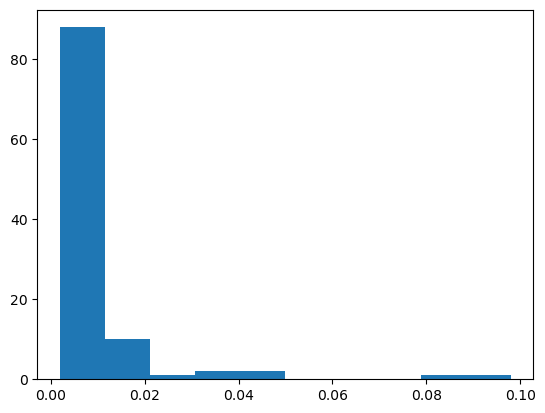

In [26]:
plt.hist(mut_freq(mt, max([np.max(list(i)) for i in mt['<0_0>'] if len(i)>0]), ['<0_0>']).to_numpy()[0])

115